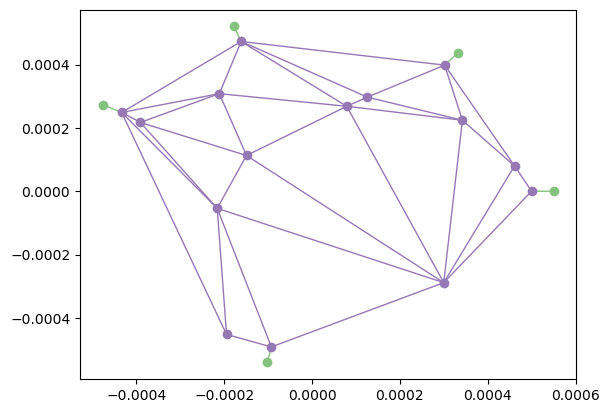

In [1]:
import copy
import os

import matplotlib.pyplot as plt
import numpy as np
import scipy
from tqdm import tqdm

from complex_network.materials.dielectric import Dielectric
from complex_network.networks import network_factory
from complex_network.networks.network_perturbator import NetworkPerturbator
from complex_network.networks.network_spec import NetworkSpec
from complex_network.networks.pole_calculator import (
    contour_integral,
    contour_integral_segment,
    find_pole,
    sweep,
    get_residue,
)

np.random.seed(1)

spec = NetworkSpec(
    network_type="delaunay",
    network_shape="circular",
    num_seed_nodes=0,
    num_internal_nodes=15,
    num_external_nodes=5,
    network_size=500e-6,
    external_size=550e-6,
    external_offset=0.0,
    node_S_mat_type="COE",
    node_S_mat_params={},
    material=Dielectric("glass"),
)

network = network_factory.generate_network(spec)
network.draw()
pole = 12532230.332102112 - 11.136143180724291j

for _ in range(100):
    pole = find_pole(network, pole)

In [2]:
# Test
def f(z):
    return (
        1j / (z - 1) ** 4
        + (2 - 4j) / (z - 1) ** 3
        + (-4 - 1j) / (z - 1) ** 2
        + (3 + 4j) / (z - 1)
        + 2
        + (3 - 1j) * (z - 1)
        + (3 - 6j) * (z - 2) ** 2
    )

print(get_residue(f, 1.001))

(2.9997955439033976+4.072289202314527j)


In [3]:
print(np.trace(get_residue(network.get_wigner_smith, pole, radius=1e-1)))
print(np.trace(get_residue(network.get_wigner_smith, pole, radius=1e-2)))
print(np.trace(get_residue(network.get_wigner_smith, pole, radius=1e-3)))
print(np.trace(get_residue(network.get_wigner_smith, pole, radius=1e-4)))
print(np.trace(get_residue(network.get_wigner_smith, pole, radius=1e-5)))
print(np.trace(get_residue(network.get_wigner_smith, pole, radius=1e-6)))
print(np.trace(get_residue(network.get_wigner_smith, pole, radius=1e-7)))
print(np.trace(get_residue(network.get_wigner_smith, pole, radius=1e-8)))

(-9.684093783823844e-09+1.0107504761233002j)
(9.752205036572814e-09+1.0107506577443055j)
(1.4341198974893166e-08+1.0107504166452397j)
(-7.111504542883784e-08+1.0107495458905538j)
(4.31948378863678e-07+1.010760154105649j)
(1.4606561689955305e-05+1.0103206717249227j)
(-0.00011868235963483423+1.0069718572874913j)
(-0.350892437919515+0.8160092330356964j)


In [4]:
print(np.trace(get_residue(network.get_wigner_smith, pole, degree=10)))
print(np.trace(get_residue(network.get_wigner_smith, pole, degree=100)))
print(np.trace(get_residue(network.get_wigner_smith, pole, degree=1000)))
print(np.trace(get_residue(network.get_wigner_smith, pole, degree=10000)))

(-9.684093783823844e-09+1.0107504761233002j)
(-9.686698818067718e-09+1.010750318547208j)
(-9.704888864758843e-09+1.0107503201480283j)
(-9.695872812964801e-09+1.0107503202164616j)


In [5]:
print(
    np.trace(
        get_residue(network.get_wigner_smith, pole, radius=1e-7, degree=10000)
    )
)

(-0.00016939096789014146+1.0099511950179263j)
